# Population Analysis with SQL
---
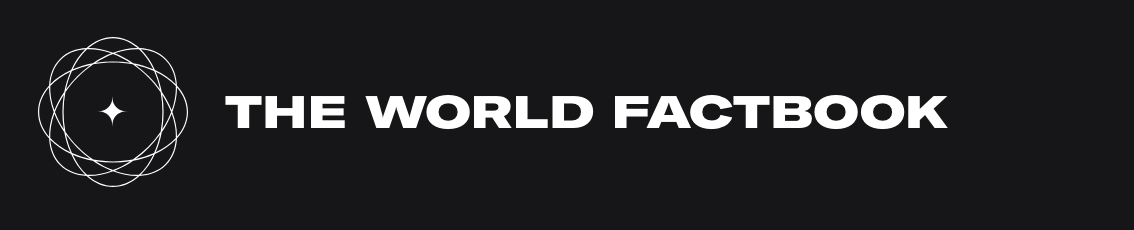

The CIA Factbook, also known as the World Factbook, is an annual publication by the US Central Intelligence Agency. It serves as a comprehensive source of basic intelligence, offering summaries of information about countries and regions globally.

In this Analysis, we will utilize SQL in jupyter notebook to analyze data from the CIA Factbook. In addition to population, we will also analyze other indicators such as mortality and fertility rates to understand what regions are at risk of population decline.

## Database

In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

## Initial Exploration

In [2]:
%%sql
SELECT * 
FROM sqlite_master
WHERE TYPE='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


The `facts` table contains the relevant columns for our analysis

In [3]:
%%sql
SELECT *
FROM facts
LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
%%sql
SELECT COUNT(*) AS num_entries,
       COUNT(DISTINCT name) AS num_countries
FROM facts;

 * sqlite:///factbook.db
Done.


num_entries,num_countries
261,261


Note only 195 countries exist, the remaining 66 countries are territories or other entities the Factbook includes. This will not affect our analysis because our scope is focused mainly on economically signifcant countries. 

Let's look at some of those entities below using the wildcard `%` operator and the `LIKE` clause:

In [5]:
%%sql
SELECT *
FROM facts
WHERE name LIKE '%union'
   OR name LIKE '%ocean'
   OR name LIKE '%island'
   OR name = 'World';

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
197,ee,European Union,4324782,None,None,513949445,0.25,10.2,10.2,2.5
199,kt,Christmas Island,135,135,0,1530,1.11,None,None,None
203,nf,Norfolk Island,36,36,0,2210,0.01,None,None,None
208,ip,Clipperton Island,6,6,0,None,None,None,None,None
222,bv,Bouvet Island,49,49,0,None,None,None,None,None
244,bq,Navassa Island,5,5,0,None,None,None,None,None
248,wq,Wake Island,6,6,0,None,None,None,None,None
256,xq,Arctic Ocean,None,None,None,None,None,None,None,None
257,zh,Atlantic Ocean,None,None,None,None,None,None,None,None
258,xo,Indian Ocean,None,None,None,None,None,None,None,None


## Limit to Economically Significant Countries
For this analysis, we will only focus on economically significant countries. We can define this as Countries with a nominal GDP (current price of goods and services not adjusted to inflation or deflation) of over $1 trillion.

As of 2022 data, those countries are: 
 - United States
 - China
 - Japan
 - Germany
 - India
 - United Kingdom
 - France
 - Russia
 - Canada
 - Italy
 - Brazil
 - Australia
 - South Korea
 - Mexico
 - Spain
 - Indonesia
 - Saudi Arabia

In [6]:
%%sql
CREATE VIEW sig_countries AS
SELECT *
FROM facts
WHERE name IN ('United States',
               'China', 
               'India',
               'Japan', 
               'Germany', 
               'India',
               'United Kingdom',
               'France', 
               'Russia',
               'Canada', 
               'Italy', 
               'Brazil',
               'Australia',
               'Korea, South', 
               'Mexico',
               'Spain', 
               'Indonesia', 
               'Saudi Arabia');

 * sqlite:///factbook.db
(sqlite3.OperationalError) view sig_countries already exists
[SQL: CREATE VIEW sig_countries AS
SELECT *
FROM facts
WHERE name IN ('United States',
               'China', 
               'India',
               'Japan', 
               'Germany', 
               'India',
               'United Kingdom',
               'France', 
               'Russia',
               'Canada', 
               'Italy', 
               'Brazil',
               'Australia',
               'Korea, South', 
               'Mexico',
               'Spain', 
               'Indonesia', 
               'Saudi Arabia');]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


*note the above kernel will showcase an error if run more than once due to the view already existing*.
Below we look at this view we created for economically significant countries

In [7]:
%%sql
SELECT * FROM sig_countries

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
24,br,Brazil,8515770,8358140,157630,204259812,0.77,14.46,6.58,0.14
32,ca,Canada,9984670,9093507,891163,35099836,0.75,10.28,8.42,5.66
37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44
61,fr,France,643801,640427,3374,66553766,0.43,12.38,9.16,1.09
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04
78,id,Indonesia,1904569,1811569,93000,255993674,0.92,16.72,6.37,1.16
83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.1
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0


## Population
Lets now focus our attention to each of the features for our economically significant countries to gain intuition around where each stand with respect to one another starting with population

In [8]:
%%sql
SELECT name AS 'Most Populated Countries',
       population AS Population
FROM sig_countries
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///factbook.db
Done.


Most Populated Countries,Population
China,1367485388
India,1251695584
United States,321368864
Indonesia,255993674
Brazil,204259812


*Note this data is accumulated from 2015*

In [9]:
%%sql
SELECT name AS 'Least Populated Countries',
       population AS Population
FROM sig_countries
ORDER BY 2
LIMIT 5;

 * sqlite:///factbook.db
Done.


Least Populated Countries,Population
Australia,22751014
Saudi Arabia,27752316
Canada,35099836
Spain,48146134
"Korea, South",49115196


## Population Density 

$ \text{Population Density} = \frac{\text{Total Population}}{\text{Land Area (km}^2\text{)}} $

### 5 Highest Population Densities of Economically Significant Countries

In [10]:
%%sql
SELECT name AS Country, area_land AS Area, population AS Population,
       CAST(
            CAST(population AS Float) / 
            CAST(area_land AS Float) 
            AS Integer) 
       AS Population_Density
FROM sig_countries
ORDER BY 4 DESC
LIMIT 5;

 * sqlite:///factbook.db
Done.


Country,Area,Population,Population_Density
"Korea, South",96920,49115196,506
India,2973193,1251695584,420
Japan,364485,126919659,348
United Kingdom,241930,64088222,264
Germany,348672,80854408,231


### 5 Lowest Population Densities of Economically Significant Countries

In [11]:
%%sql
SELECT name AS Country, area_land AS Area, population AS Population,
       CAST(
            CAST(population AS Float) / 
            CAST(area_land AS Float) 
            AS Integer) 
       AS Population_Density
FROM sig_countries
ORDER BY 4
LIMIT 5;

 * sqlite:///factbook.db
Done.


Country,Area,Population,Population_Density
Australia,7682300,22751014,2
Canada,9093507,35099836,3
Russia,16377742,142423773,8
Saudi Arabia,2149690,27752316,12
Brazil,8358140,204259812,24


## Mortality and Fertility

### Birth Rates Among Economically Significant Countries

In [12]:
%%sql 
SELECT name AS Country, birth_rate AS 'Birth Rate'
FROM sig_countries
ORDER BY 2 DESC;

 * sqlite:///factbook.db
Done.


Country,Birth Rate
India,19.55
Mexico,18.78
Saudi Arabia,18.51
Indonesia,16.72
Brazil,14.46
China,12.49
United States,12.49
France,12.38
United Kingdom,12.17
Australia,12.15


### Death Rates Among Economically Significant Countries

In [13]:
%%sql
SELECT name AS Country, death_rate AS 'Death Rate'
FROM sig_countries
ORDER BY 2 DESC;

 * sqlite:///factbook.db
Done.


Country,Death Rate
Russia,13.69
Germany,11.42
Italy,10.19
Japan,9.51
United Kingdom,9.35
France,9.16
Spain,9.04
Canada,8.42
United States,8.15
China,7.53


### Birth to Death Ratio Among World

In [14]:
%%sql 
SELECT birth_rate as 'Birth Rate', death_rate AS 'Death Rate',
       ROUND((birth_rate / death_rate), 2) 
       AS 'World Birth to Death Ratio'
FROM facts
WHERE name = 'World';

 * sqlite:///factbook.db
Done.


Birth Rate,Death Rate,World Birth to Death Ratio
18.6,7.8,2.38


### Birth to Death Ratio Among Economically Significant Countries

$ \text{Birth to Death Ratio} = \frac{\text{Birth Rate}}{\text{Death Rate}} $

In [15]:
%%sql 
SELECT name AS Country, birth_rate AS 'Birth Rate', death_rate as 'Death Rate',
       ROUND((birth_rate / death_rate), 2) 
       AS 'Birth to Death Ratio'
FROM sig_countries
ORDER BY 4 DESC;

 * sqlite:///factbook.db
Done.


Country,Birth Rate,Death Rate,Birth to Death Ratio
Saudi Arabia,18.51,3.33,5.56
Mexico,18.78,5.26,3.57
India,19.55,7.32,2.67
Indonesia,16.72,6.37,2.62
Brazil,14.46,6.58,2.2
Australia,12.15,7.14,1.7
China,12.49,7.53,1.66
United States,12.49,8.15,1.53
France,12.38,9.16,1.35
United Kingdom,12.17,9.35,1.3


---

# High Risk Countries by Population Decline Criteria

We define high risk as Countries with a Birth to Death Ratio of less than 1

In [26]:
%%sql
CREATE VIEW hr_countries AS
SELECT name AS Country, birth_rate AS 'Birth Rate', death_rate as 'Death Rate',
       ROUND((birth_rate / death_rate), 2) 
       AS 'Birth_to_Death_Ratio'
 FROM sig_countries
WHERE Birth_to_Death_Ratio < 1;

 * sqlite:///factbook.db
Done.


[]

In [30]:
%%sql
SELECT * 
  FROM hr_countries
 ORDER BY 4;

 * sqlite:///factbook.db
Done.


Country,Birth Rate,Death Rate,Birth_to_Death_Ratio
Germany,8.47,11.42,0.74
Japan,7.93,9.51,0.83
Russia,11.6,13.69,0.85
Italy,8.74,10.19,0.86


## Conclusion
Based on our quick analysis, **Germany, Japan, Russia, and Italy** all exhibit significant risk to population decline.